<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
PREFIX = ['y', 'n']

result_dfs = []

for scl_prefix in PREFIX:
    for re_prefix in PREFIX:
        result_df = pd.read_csv('CSV/song1_result-' + scl_prefix +
                                re_prefix + '.csv')
        result_df['scaling'] = scl_prefix
        result_df['resampling'] = re_prefix
        result_dfs.append(result_df)
        result_df = pd.concat(result_dfs, ignore_index=True)
result_df

,train_who,train_porder,train_score,valid_who,valid_porder,valid_score,test_who,test_porder,test_score,f1_score,scaling,resampling
0,1,1,243400,1,1,243400,1,1,243400,1.0000,y,y
1,1,1,243400,1,1,243400,1,2,223010,0.9331,y,y
2,1,1,243400,1,1,243400,1,3,181870,0.9102,y,y
3,1,1,243400,1,1,243400,2,1,210550,0.7416,y,y
4,1,1,243400,1,1,243400,2,2,251930,0.7633,y,y
5,1,1,243400,1,1,243400,2,3,223700,0.7363,y,y
6,1,1,243400,1,1,243400,3,1,110320,0.9143,y,y
7,1,1,243400,1,1,243400,3,2,122580,0.8861,y,y
8,1,1,243400,1,1,243400,3,3,112370,0.8884,y,y
9,1,1,243400,1,1,243400,4,1,222600,0.8057,y,y


In [3]:
df = result_df
ming_df = df[(df['train_who'] == df['test_who'])
             & (df['train_who'] == df['valid_who'])]

In [4]:
ming_df

,train_who,train_porder,train_score,valid_who,valid_porder,valid_score,test_who,test_porder,test_score,f1_score,scaling,resampling
0,1,1,243400,1,1,243400,1,1,243400,1.0000,y,y
1,1,1,243400,1,1,243400,1,2,223010,0.9331,y,y
2,1,1,243400,1,1,243400,1,3,181870,0.9102,y,y
24,1,1,243400,1,2,223010,1,1,243400,1.0000,y,y
25,1,1,243400,1,2,223010,1,2,223010,0.9554,y,y
26,1,1,243400,1,2,223010,1,3,181870,0.9356,y,y
48,1,1,243400,1,3,181870,1,1,243400,1.0000,y,y
49,1,1,243400,1,3,181870,1,2,223010,0.9499,y,y
50,1,1,243400,1,3,181870,1,3,181870,0.9384,y,y
576,1,2,223010,1,1,243400,1,1,243400,0.9389,y,y


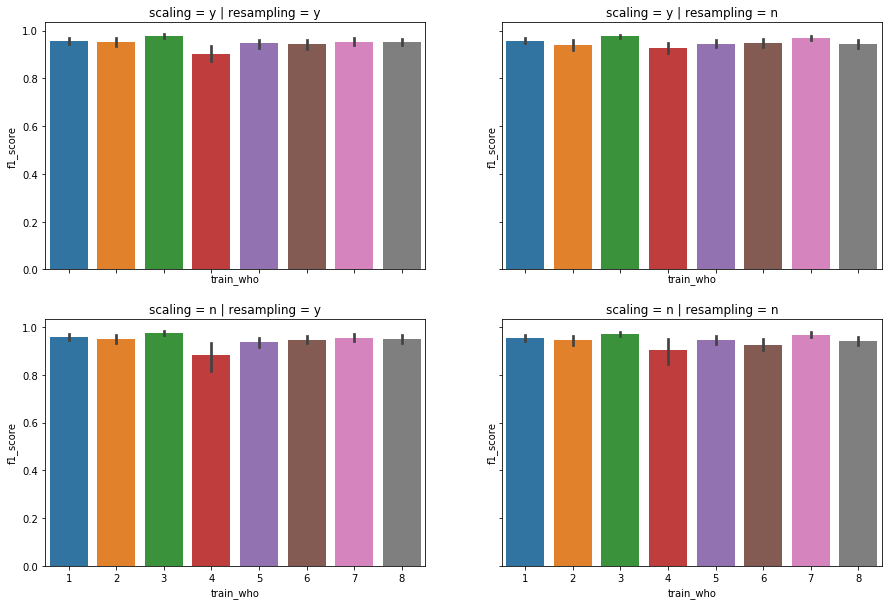

In [5]:
f, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(15, 10))
for i, scl_prefix in enumerate(PREFIX):
    for j, re_prefix in enumerate(PREFIX):
        df = ming_df[(ming_df['scaling'] == scl_prefix) & (ming_df['resampling'] == re_prefix)]
        sns.barplot(x='train_who', y='f1_score', data=df, ax=axes[i, j])
        axes[i, j].set_title('scaling = %s | resampling = %s' % (scl_prefix, re_prefix))
plt.show()

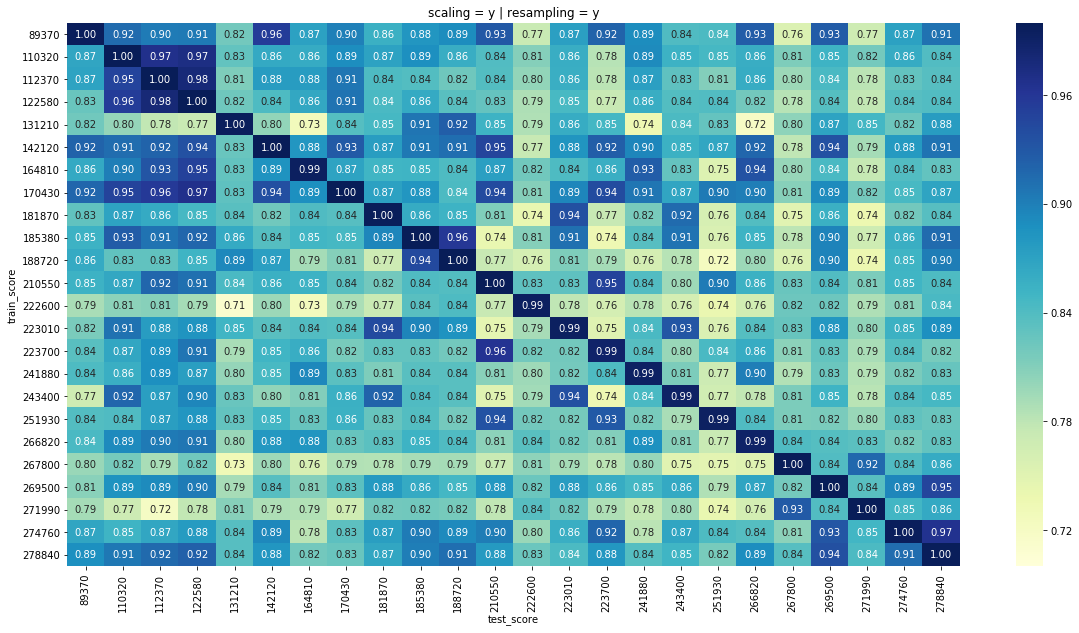

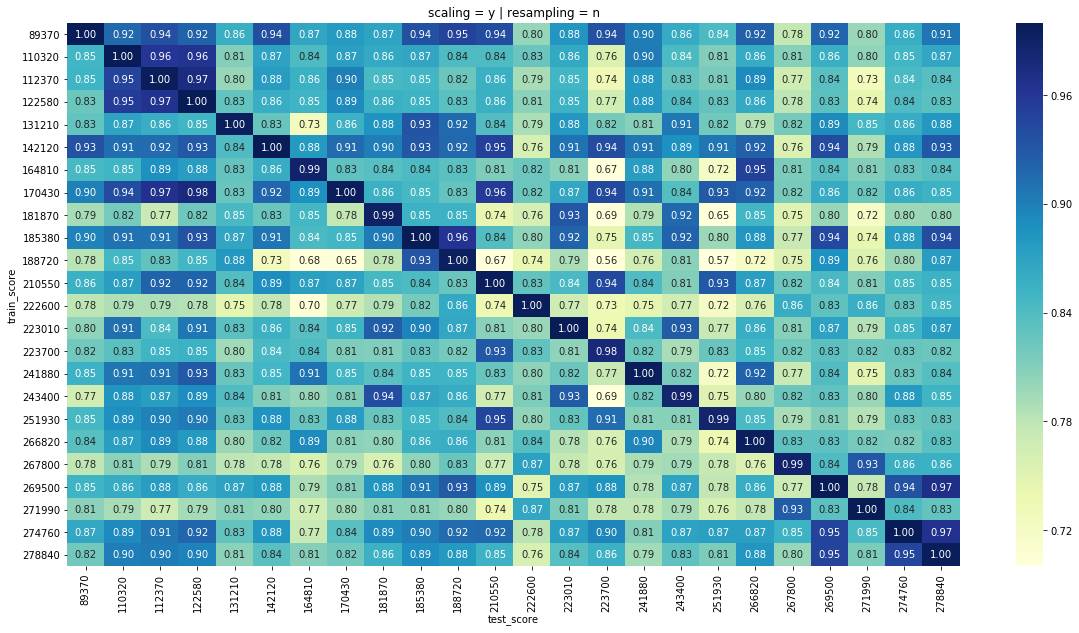

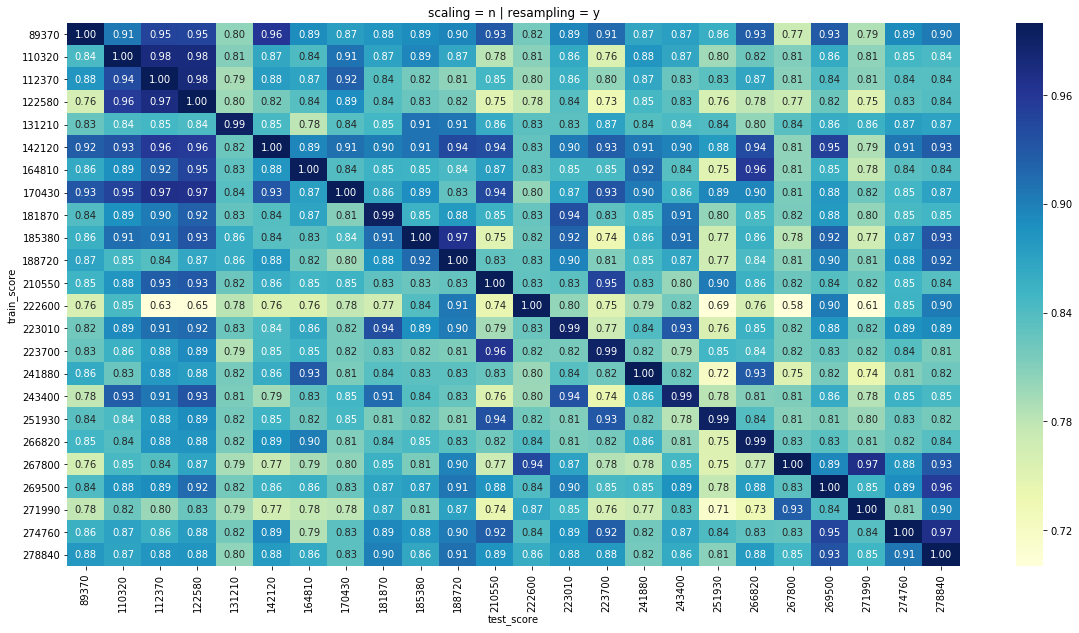

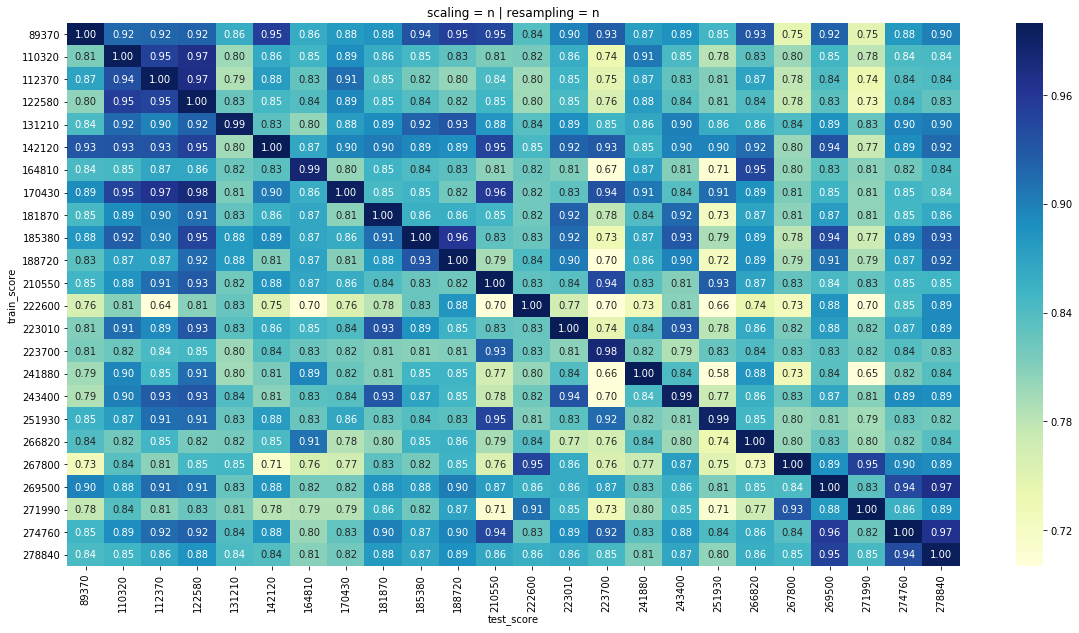

In [7]:
for i, scl_prefix in enumerate(PREFIX):
    for j, re_prefix in enumerate(PREFIX):
        df = result_df[(result_df['scaling'] == scl_prefix)
                       & (result_df['resampling'] == re_prefix)]
        df = df.groupby(['train_score',
                         'test_score'])['f1_score'].mean().reset_index()
        
        plt.figure(figsize=(20, 10))
        sns.heatmap(
            df.pivot('train_score', 'test_score', 'f1_score'),
            annot=True,
            fmt=".2f",
            cmap="YlGnBu",
            vmax=1,
            vmin=0.7)
        plt.title('scaling = %s | resampling = %s' % (scl_prefix, re_prefix))
        plt.show()